# Find ICESat-2 Snow-On Dates

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
#from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
#import scipy.stats
#import contextily as cx
#from matplotlib_scalebar.scalebar import ScaleBar
import rasterio as rio
#from rasterio import features
#from rasterio.plot import show
#import rioxarray
from astropy.time import Time
from datetime import datetime
import pickle
#from imview.lib import pltlib
#import hvplot.pandas
#from holoviews.element.tiles import EsriImagery, StamenTerrain
#from geoviews import opts, tile_sources as gvts

In [2]:
#Add DOY and DOWY column
def add_dowy(df, col=None):
    print("Adding Day of Water Year (DOWY)")
    if col is None:
        df['doy'] = df.index.dayofyear
        df['decyear'] = Time(df.index).decimalyear
    else:
        df['doy'] = pd.to_datetime(df[col]).dt.dayofyear
        df['decyear'] = Time(pd.to_datetime(df[col])).decimalyear
    
    #df['dowy'] = (df['doy'].index - pd.DateOffset(months=9)).dayofyear
    # Sept 30 is doy 273
    df['dowy'] = df['doy'] - 273
    df.loc[df['dowy'] <= 0, 'dowy'] += 365

In [3]:
fn = '../../../data/snotel_depths.pkl'
gm_sntl = pickle.load(open(fn, 'rb'))

<AxesSubplot:xlabel='Date'>

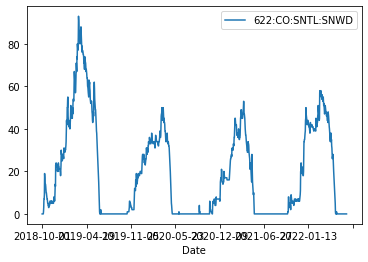

In [11]:
gm_sntl.plot()

In [13]:
gm_sntl.head(2)

,622:CO:SNTL:SNWD
Date,
2018-10-01,0.0
2018-10-02,0.0


In [9]:
gm_sntl = gm_sntl.rename(columns={'622:CO:SNTL:SNWD':'snow_depth'})

In [4]:
gm_sntl = gm_sntl * 2.54/100
gm_sntl.index = pd.DatetimeIndex(gm_sntl.index)

In [6]:
add_dowy(gm_sntl)
gm_sntl.head()

Adding Day of Water Year (DOWY)


,622:CO:SNTL:SNWD,doy,decyear,dowy
Date,,,,
2018-10-01,0.0,274,2018.747945,1
2018-10-02,0.0,275,2018.750685,2
2018-10-03,0.0,276,2018.753425,3
2018-10-04,0.0,277,2018.756164,4
2018-10-05,0.0,278,2018.758904,5


In [12]:
idx_st = (gm_sntl['snow_depth'] < 0.1)
idx_st

Date
2018-10-01     True
2018-10-02     True
2018-10-03     True
2018-10-04     True
2018-10-05     True
              ...  
2022-07-09    False
2022-07-10    False
2022-07-11    False
2022-07-12    False
2022-07-13    False
Name: snow_depth, Length: 1382, dtype: bool